# MDS hw4
R10725026 資管碩一 黃奕滔

## 1.
### (a)

In [5]:
import numpy as np
class Ewma():
    def __init__(self, alpha, coefficient):
        self.alpha = alpha
        self.coefficient = coefficient

    def predict(self, X):
        s = [X[0]]
        for i in range(1, len(X)):
            temp = self.alpha * X[i] + (1 - self.alpha) * s[-1]
            s.append(temp)
        s_avg = 70
        sigma = 3
        print(s)
        ucl = s_avg + self.coefficient * sigma * (self.alpha / (2 - self.alpha))**0.5
        lcl = s_avg - self.coefficient * sigma * (self.alpha / (2 - self.alpha))**0.5
        print("UCL =", ucl)
        print("LCL =", lcl)
        for idx, i in enumerate(s):
            if i > ucl or i < lcl:
                print(f"point {idx}: {i} NOT in control")
                return 
        print("All in control.")
        return 

In [6]:
ewma = Ewma(0.1, 2.81)
x = [68, 71, 67, 69, 71, 70, 69, 67, 70, 70, 79, 79, 78, 78, 78, 79, 79, 82, 82, 81]

ewma.predict(x)

[68, 68.3, 68.17, 68.253, 68.5277, 68.67492999999999, 68.707437, 68.5366933, 68.68302397, 68.81472157299999, 69.8332494157, 70.74992447413, 71.474932026717, 72.1274388240453, 72.71469494164077, 73.3432254474767, 73.90890290272904, 74.71801261245614, 75.44621135121052, 76.00159021608947]
UCL = 71.93397463652883
LCL = 68.06602536347117
point 0: 68 NOT in control


### (b)

In [7]:
ewma = Ewma(0.5, 3.07)

ewma.predict(x)

[68, 69.5, 68.25, 68.625, 69.8125, 69.90625, 69.453125, 68.2265625, 69.11328125, 69.556640625, 74.2783203125, 76.63916015625, 77.319580078125, 77.6597900390625, 77.82989501953125, 78.41494750976562, 78.70747375488281, 80.3537368774414, 81.1768684387207, 81.08843421936035]
UCL = 75.31739597923645
LCL = 64.68260402076355
point 11: 76.63916015625 NOT in control


兩個都 out of control，第(b)小題超過UCL，(a)小題超過LCL，除此之外，(b)到第12個data point才超過，然而(a)在第一個就超過了。

### (c)

In [9]:
upper = (71.93397463652883 - 76) / (9 / 20 * 19)
print(f"upper: {upper}")
lower = (68.06602536347117 - 76) / (9 / 20 * 19)
print(f"lower: {lower}")

upper: -0.4755585220434116
lower: -0.9279502498864128


In [10]:
# 查表得到0.17671669 和 0.317195，代入公式
p_a = 0.17671669 + (1 - 0.317195)
ARL_a = 1 / p_a
print(f"ARL of (a): {ARL_a}")

ARL of (a): 1.1634377720008438


In [11]:
upper = (75.31739597923645 - 76) / (9 / 20 * 19)
print(f"upper: {upper}")
lower = (64.682604020763557 - 76) / (9 / 20 * 19)
print(f"lower: {lower}")

upper: -0.07983672757468405
lower: -1.3236720443551386


In [12]:
p_b = 0.09280599 + (1 - 0.46818356)
ARL_b = 1 / p_b
print(f"ARL of (b): {ARL_b}")

ARL of (b): 1.600967163475061


### (d)

In [13]:
p1 = 1 / ARL_a
print(f"p of (a) = {p1}")
p2 = 1 / ARL_b  
print(f"p of (b) = {p2}")

p of (a) = 0.8595216900000001
p of (b) = 0.6246224300000001


### (e)

In [14]:
print(f"part (a): {1- p1}")
print(f"part (b): {1- p2}")

part (a): 0.14047830999999988
part (b): 0.37537756999999994


## 2.
### (a)

In [31]:
import pandas as pd
col_names = ['unit-number', 'time-in-cycles', 'operational-setting-1', 'operational-setting-2', 'operational-setting-3']
for i in range(1, 24):
    col_names.append(f'sensor-measurement-{i}')
train = pd.read_csv('train.txt', sep=' ', names=col_names)
train = train.drop(["sensor-measurement-22", "sensor-measurement-23"], axis=1)
train

,unit-number,time-in-cycles,operational-setting-1,operational-setting-2,operational-setting-3,sensor-measurement-1,sensor-measurement-2,sensor-measurement-3,sensor-measurement-4,sensor-measurement-5,...,sensor-measurement-12,sensor-measurement-13,sensor-measurement-14,sensor-measurement-15,sensor-measurement-16,sensor-measurement-17,sensor-measurement-18,sensor-measurement-19,sensor-measurement-20,sensor-measurement-21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,130.21,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,130.24,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,129.86,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,182.03,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761


In [32]:
train_max = train.groupby('unit-number').max("time-in-cycles")["time-in-cycles"]
train['remain-useful-life'] = 0

for i in range(len(train)):
     train['remain-useful-life'].iloc[i] = train_max[train['unit-number'].iloc[i]] - train['time-in-cycles'].iloc[i]
train

/Users/cupid/Desktop/projects/MDS_hw/env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,unit-number,time-in-cycles,operational-setting-1,operational-setting-2,operational-setting-3,sensor-measurement-1,sensor-measurement-2,sensor-measurement-3,sensor-measurement-4,sensor-measurement-5,...,sensor-measurement-13,sensor-measurement-14,sensor-measurement-15,sensor-measurement-16,sensor-measurement-17,sensor-measurement-18,sensor-measurement-19,sensor-measurement-20,sensor-measurement-21,remain-useful-life
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,222
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,221
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,220
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,219
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,4
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,3
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,2
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,1


### (b)

In [33]:
from scipy.stats import variation
unit = train[train['unit-number'] == 1]
variation_list = variation(unit.iloc[:, 5:26])
print(variation_list)
maxs = 0
max_index = 0
for i in range(len(variation_list)):
    if variation_list[i] > maxs:
        maxs = variation_list[i]
        max_index = i
print(f"Sensor {max_index+1} has maximum coefficient of variation.")

mins = 1000
min_index = 0
for i in range(len(variation_list)):
    if variation_list[i] < mins:
        mins = variation_list[i]
        min_index = i
print(f"Sensor {min_index + 1} has minimum coefficient of variation.")

[0.05370123 0.06373167 0.0754959  0.09926825 0.44633746 0.46859457
 0.5269718  0.07134013 0.03994183 0.11729558 0.07998633 0.52795393
 0.06237729 0.01142003 0.08559927 0.19973639 0.08089319 0.07138405
 0.06237875 0.48050471 0.48035774]
Sensor 12 has maximum coefficient of variation.
Sensor 14 has minimum coefficient of variation.


Sensor 12 提供了最多的資訊量（因為變異數比較大）
### (c)

In [34]:
for j in range(1,22):
    unit[f'moving-average-{j}'] = 0
    unit[f'moving-variance-{j}'] = 0
    unit[f'moving-peak-value-{j}'] = 0
    for i in range(223):
        unit[f'moving-average-{j}'].iloc[i] = unit[f'sensor-measurement-{j}'].iloc[i:i+9].mean()
        unit[f'moving-variance-{j}'].iloc[i] = unit[f'sensor-measurement-{j}'].iloc[i:i+9].var()
        unit[f'moving-peak-value-{j}'].iloc[i] = unit[f'sensor-measurement-{j}'].iloc[i:i+9].max()
unit

/var/folders/wm/vnygp9t52832z1yrwmnknjmr0000gn/T/ipykernel_12493/2022161564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit[f'moving-average-{j}'] = 0
/var/folders/wm/vnygp9t52832z1yrwmnknjmr0000gn/T/ipykernel_12493/2022161564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit[f'moving-variance-{j}'] = 0
/var/folders/wm/vnygp9t52832z1yrwmnknjmr0000gn/T/ipykernel_12493/2022161564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,unit-number,time-in-cycles,operational-setting-1,operational-setting-2,operational-setting-3,sensor-measurement-1,sensor-measurement-2,sensor-measurement-3,sensor-measurement-4,sensor-measurement-5,...,moving-peak-value-18,moving-average-19,moving-variance-19,moving-peak-value-19,moving-average-20,moving-variance-20,moving-peak-value-20,moving-average-21,moving-variance-21,moving-peak-value-21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388,100.000000,0.000000,100,25.638889,138.220411,38.99,15.353200,49.320679,23.3619
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388,100.000000,0.000000,100,23.657778,160.433619,38.99,14.159122,57.262520,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2388,98.325556,25.233878,100,20.912222,133.561494,38.99,12.508767,47.602907,23.2412
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388,98.325556,25.233878,100,20.896667,133.776550,38.99,12.502467,47.655049,23.2412
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2388,98.325556,25.233878,100,19.345556,143.133628,38.99,11.564133,50.764076,23.2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,219,35.0073,0.8400,60.0,449.44,556.39,1381.50,1149.74,5.48,...,2388,100.000000,0.000000,100,21.444000,109.736630,38.67,12.776280,39.113231,23.0218
219,1,220,35.0027,0.8400,60.0,449.44,556.65,1375.43,1149.45,5.48,...,2388,100.000000,0.000000,100,23.100000,128.033267,38.67,13.771200,45.551870,23.0218
220,1,221,0.0008,0.0000,100.0,518.67,643.88,1593.26,1425.82,14.62,...,2388,100.000000,0.000000,100,25.883333,145.568233,38.67,15.418600,52.044244,23.0218
221,1,222,20.0003,0.7001,0.0,491.19,608.00,1494.99,1270.18,9.35,...,2324,100.000000,0.000000,100,19.490000,45.888200,24.28,11.617000,17.375513,14.5645


### (d)

In [35]:
unit['RUL-moving-avg'] = 0
for i in range(223):
        unit['RUL-moving-avg'].iloc[i] = unit['remain-useful-life'].iloc[i:i+10].mean()
unit = unit.drop([222,221]) # drop under 10s
engineered = unit.iloc[:,27:].corr()['RUL-moving-avg'].abs()
top10 = engineered.sort_values(ascending=False)[1:11]
top10

/var/folders/wm/vnygp9t52832z1yrwmnknjmr0000gn/T/ipykernel_12493/2203173243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit['RUL-moving-avg'] = 0
/Users/cupid/Desktop/projects/MDS_hw/env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/cupid/Desktop/projects/MDS_hw/env/lib/python3.9/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

moving-peak-value-13    0.831047
moving-variance-11      0.305001
moving-variance-3       0.298016
moving-variance-14      0.294931
moving-variance-17      0.289180
moving-variance-15      0.288339
moving-variance-10      0.287173
moving-variance-9       0.282408
moving-variance-4       0.266192
moving-variance-18      0.248364
Name: RUL-moving-avg, dtype: float64

### (e)

In [36]:
from sklearn.ensemble import RandomForestRegressor
X = unit.iloc[:,27:-1]
y = unit.iloc[:,-1]

rf = RandomForestRegressor(random_state=880203)
rf.fit(X, y)


RandomForestRegressor(random_state=880203)

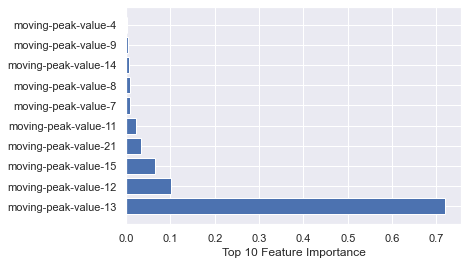

Top 10 Feature Importance is Index(['moving-peak-value-13', 'moving-peak-value-12', 'moving-peak-value-15',
       'moving-peak-value-21', 'moving-peak-value-11', 'moving-peak-value-7',
       'moving-peak-value-8', 'moving-peak-value-14', 'moving-peak-value-9',
       'moving-peak-value-4'],
      dtype='object')
Moving peak value 13 is the most important features.


In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

sorted_idx = (-rf.feature_importances_).argsort()[:10]
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Top 10 Feature Importance")
plt.show()
print(f"Top 10 Feature Importance is {X.columns[sorted_idx]}")
print("Moving peak value 13 is the most important features.")

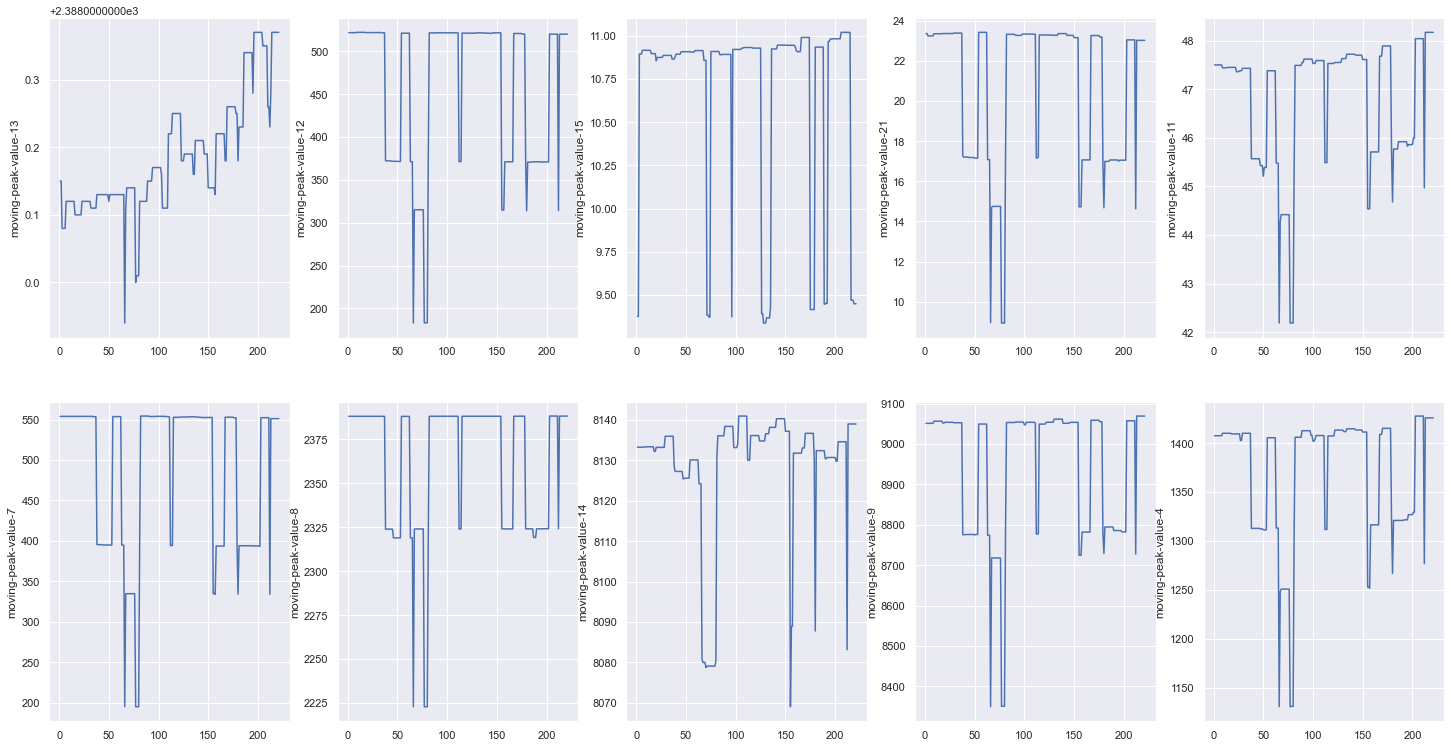

In [39]:
plt.figure(figsize=(25, 20))
for i in range(10):
    plt.subplot(3, 5, i + 1)
    sns.lineplot(x=range(1, 222), y=unit.iloc[:, 27 + sorted_idx[i]])

### (f) 送分

## 3.
### (a) 送分
### (b)

In [1]:
import random
import time

In [2]:
p = [10, 10, 13, 4, 9, 4, 8, 15, 7, 1, 9, 3, 15, 9, 11, 6, 5, 14, 18, 3]
due = [50, 38, 49, 12, 20, 105, 73, 45, 6, 64, 15, 6, 92, 43, 78, 21, 15, 50, 150, 99]
weight = [10, 5, 1, 5, 10, 1, 5, 10, 5, 1, 5, 10, 10, 5, 1, 10, 5, 5, 1, 5]


In [42]:
def tabu_search(p, due, weight, size):
    def tardiness(seq, job_num=20):
        tard = 0
        accumulate_time = 0
        
        for i in range(job_num):
            job = seq[i] - 1
            tard = tard + weight[job] * max((accumulate_time + p[job] - due[job]), 0)
            accumulate_time = accumulate_time + p[job]
            
        return(tard)
    
    seq = list(range(21))
    random.shuffle(seq)
    seq
    
    start_time = time.time()

    tabu_size = size
    tabu = []

    all_min_tard = 9999
    all_min_seq = []
    tabu_mins = []

    for _ in range(100000):
        min_tard = np.inf
        min_seq = seq
        
        for i in range(19):
            j = i + 1
            if([seq[i], seq[j]] in tabu or [seq[j], seq[i]] in tabu):
                continue

            cur_seq = seq
            cur_seq[i], cur_seq[j] = cur_seq[j], cur_seq[i]
            tard = tardiness(cur_seq)

            if tard < min_tard:
                min_tard = tard
                min_seq = cur_seq
                swap_ord = [cur_seq[i], cur_seq[j]]

                if tard < all_min_tard:
                    all_min_tard = tard
                    all_min_seq = cur_seq.copy()

        seq = min_seq
        tabu_mins.append(tardiness(min_seq))
        tabu.append(swap_ord)

        if len(tabu) > tabu_size:
            tabu.pop(0)

    return all_min_seq, all_min_tard, time.time() - start_time

In [45]:
try_sizes = [i for i in range(3, 25, 2)]
print(f"try over {try_sizes}")

try over [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


In [46]:
min_seqs = []
min_tards = []
time_spends = []
for trial in try_sizes:
    print(f"try tabu size: {trial}")
    all_min_seq, all_min_tard, time_TS = tabu_search(p, due, weight, trial)
    min_seqs.append(all_min_seq)
    min_tards.append(all_min_tard)
    time_spends.append(time_TS)
    print("The job schedulign sequence is", all_min_seq)
    print("The minimum of tardiness is", all_min_tard)
    print("Time spent in TS is", time_TS)
    print("------------------------------------------------------------------------")


try tabu size: 3
The job schedulign sequence is [12, 17, 4, 1, 7, 16, 9, 8, 11, 14, 13, 0, 2, 20, 6, 10, 19, 15, 18, 3, 5]
The minimum of tardiness is 2021
Time spent in TS is 15.036142826080322
------------------------------------------------------------------------
try tabu size: 5
The job schedulign sequence is [10, 12, 9, 16, 17, 5, 0, 11, 1, 8, 14, 13, 18, 7, 6, 3, 2, 20, 15, 19, 4]
The minimum of tardiness is 2160
Time spent in TS is 15.287652015686035
------------------------------------------------------------------------
try tabu size: 7
The job schedulign sequence is [12, 5, 17, 10, 9, 16, 4, 11, 1, 8, 14, 13, 20, 0, 7, 18, 15, 6, 2, 3, 19]
The minimum of tardiness is 2190
Time spent in TS is 15.728075981140137
------------------------------------------------------------------------
try tabu size: 9
The job schedulign sequence is [9, 12, 4, 17, 16, 5, 14, 11, 1, 8, 7, 10, 2, 20, 18, 19, 15, 6, 0, 3, 13]
The minimum of tardiness is 2035
Time spent in TS is 15.546052694320679
-

結果並沒有隨著 tabu size 上升有明顯的趨勢，可得知 baseline (size=10) 2035的結果已經差不多了。

### (c)

In [6]:
def GA(p, due, weight, population_size=30, crossover_rate=0.8, mutation_rate=0.1, mutation_selection_rate=0.5, num_iteration=2000):
    num_job = 20
    import copy
    import numpy as np
    # # Input 
    # population_size = int(input('Please input the size of population: ')) 
    # crossover_rate = float(input('Please input the size of Crossover Rate: ') ) 
    # mutation_rate = float(input('Please input the size of Mutation Rate: ') )
    # mutation_selection_rate = float(input('Please input the mutation selection rate: ') )
    num_mutation_jobs = round(num_job * mutation_selection_rate)
    # num_iteration = int(input('Please input number of iteration: ') ) 

    start_time = time.time()
    
    # generate initial population 
    Tbest = np.inf
    best_list = [] 
    best_obj = []
    population_list=[]

    for i in range(population_size):
        random_num=list(np.random.permutation(num_job)) # generate a random permutation of 0 to num_job-1
        population_list.append(random_num) # add to the population_list
        
    for n in range(num_iteration):
        Tbest_now = 100000000

        # crossover
        parent_list = copy.deepcopy(population_list)
        offspring_list = copy.deepcopy(population_list)
        S = list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover

        for m in range(int(population_size/2)):
            crossover_prob = np.random.rand()
            if crossover_rate >= crossover_prob:
                parent_1 = population_list[S[2*m]][:]
                parent_2 = population_list[S[2*m+1]][:]
                child_1 = ['na' for i in range(num_job)]
                child_2 = ['na' for i in range(num_job)]
                fix_num = round(num_job/2)
                g_fix = list(np.random.choice(num_job, fix_num, replace=False))

                for g in range(fix_num):
                    child_1[g_fix[g]] = parent_2[g_fix[g]]
                    child_2[g_fix[g]] = parent_1[g_fix[g]]
                c1 = [parent_1[i] for i in range(num_job) if parent_1[i] not in child_1]
                c2 = [parent_2[i] for i in range(num_job) if parent_2[i] not in child_2]

                for i in range(num_job - fix_num):
                    child_1[child_1.index('na')] = c1[i]
                    child_2[child_2.index('na')] = c2[i]
                offspring_list[S[2*m]] = child_1[:]
                offspring_list[S[2*m+1]] = child_2[:]

        # mutatuon  
        for m in range(len(offspring_list)):
            mutation_prob = np.random.rand()
            if mutation_rate >= mutation_prob:
                m_chg = list(np.random.choice(num_job, num_mutation_jobs, replace=False)) # chooses the position to mutation
                t_value_last = offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
                for i in range(num_mutation_jobs-1): 
                    offspring_list[m][m_chg[i]] = offspring_list[m][m_chg[i+1]] # displacement

                offspring_list[m][m_chg[num_mutation_jobs-1]] = t_value_last # move the value of the first mutation position to the last mutation position


        # fitness value(calculate tardiness)
        total_chromosome = copy.deepcopy(parent_list) + copy.deepcopy(offspring_list) # parent and offspring chromosomes combination
        chrom_fitness, chrom_fit = [],[]
        total_fitness=0
        for i in range(population_size*2):
            ptime = 0
            tardiness = 0
            for j in range(num_job):
                ptime = ptime + p[total_chromosome[i][j]]
                tardiness = tardiness + weight[total_chromosome[i][j]] * max(ptime - due[total_chromosome[i][j]],0)
            chrom_fitness.append(1/tardiness)
            chrom_fit.append(tardiness)
            total_fitness=total_fitness + chrom_fitness[i]

        # selection
        pk, qk = [],[]

        for i in range(population_size*2):
            pk.append(chrom_fitness[i]/total_fitness)
        for i in range(population_size*2):
            cumulative=0
            for j in range(0,i+1):
                cumulative=cumulative+pk[j]
            qk.append(cumulative)

        selection_rand=[np.random.rand() for i in range(population_size)]

        for i in range(population_size):
            if selection_rand[i] <= qk[0]:
                population_list[i] = copy.deepcopy(total_chromosome[0])
            else:
                for j in range(0,population_size*2-1):
                    if selection_rand[i] > qk[j] and selection_rand[i] <= qk[j+1]:
                        population_list[i] = copy.deepcopy(total_chromosome[j+1])
                        break

        # comparison
        for i in range(population_size*2):
            if chrom_fit[i] < Tbest_now:
                Tbest_now = chrom_fit[i]
                sequence_now = copy.deepcopy(total_chromosome[i])

        if Tbest_now <= Tbest:
            Tbest = Tbest_now
            sequence_best = copy.deepcopy(sequence_now)

        job_sequence_ptime = 0
        num_tardy = 0
        for k in range(num_job):
            job_sequence_ptime = job_sequence_ptime + p[sequence_best[k]]
            if job_sequence_ptime > due[sequence_best[k]]:
                num_tardy = num_tardy+1
            
    return sequence_best, Tbest, Tbest/num_job, num_tardy, (time.time() - start_time)

要嘗試的參數組合

In [7]:
population_sizes = [30, 60, 15]
crossover_rates = [0.8, 0.9, 0.7]
mutation_rates = [0.1, 0.2, 0.3]
mutation_selection_rates = [0.5, 0.6, 0.4]
num_iterations = [2000, 4000, 1000]

In [8]:
for population_size in population_sizes:
    sequence_best, Tbest, mean_tardiness, num_tardy, GA_time = GA(p, due, weight, population_size=population_size)
    print(f"optimal sequence: {sequence_best}")
    print(f"optimal value: {Tbest}")
    print(f"average tardiness: {mean_tardiness}")
    print(f"number of tardy: {num_tardy}")
    print(f'the elapsed time: {GA_time}')

optimal sequence: [11, 15, 3, 4, 16, 8, 0, 1, 7, 9, 6, 19, 12, 10, 13, 5, 17, 14, 2, 18]
optimal value: 2040
average tardiness: 102.0
number of tardy: 16
the elapsed time: 23.182656049728394
optimal sequence: [11, 16, 3, 15, 4, 8, 7, 0, 9, 13, 1, 12, 19, 6, 10, 17, 5, 14, 2, 18]
optimal value: 1963
average tardiness: 98.15
number of tardy: 14
the elapsed time: 49.23681592941284
optimal sequence: [3, 11, 9, 15, 4, 16, 7, 8, 0, 10, 6, 19, 12, 1, 13, 5, 2, 17, 14, 18]
optimal value: 2107
average tardiness: 105.35
number of tardy: 15
the elapsed time: 11.363116025924683


In [9]:
for crossover_rate in crossover_rates:
    sequence_best, Tbest, mean_tardiness, num_tardy, GA_time = GA(p, due, weight, crossover_rate=crossover_rate)
    print(f"optimal sequence: {sequence_best}")
    print(f"optimal value: {Tbest}")
    print(f"average tardiness: {mean_tardiness}")
    print(f"number of tardy: {num_tardy}")
    print(f'the elapsed time: {GA_time}')

optimal sequence: [11, 15, 3, 4, 16, 8, 9, 13, 0, 7, 6, 12, 10, 19, 1, 17, 2, 5, 14, 18]
optimal value: 1989
average tardiness: 99.45
number of tardy: 16
the elapsed time: 23.844682931900024
optimal sequence: [11, 4, 16, 15, 3, 7, 0, 8, 13, 6, 9, 12, 5, 19, 1, 10, 17, 14, 18, 2]
optimal value: 2024
average tardiness: 101.2
number of tardy: 14
the elapsed time: 25.3003089427948
optimal sequence: [11, 8, 3, 15, 16, 4, 7, 0, 13, 9, 6, 12, 10, 5, 19, 1, 17, 14, 18, 2]
optimal value: 1986
average tardiness: 99.3
number of tardy: 16
the elapsed time: 21.361692190170288


In [10]:
for mutation_rate in mutation_rates:
    sequence_best, Tbest, mean_tardiness, num_tardy, GA_time = GA(p, due, weight, mutation_rate=mutation_rate)
    print(f"optimal sequence: {sequence_best}")
    print(f"optimal value: {Tbest}")
    print(f"average tardiness: {mean_tardiness}")
    print(f"number of tardy: {num_tardy}")
    print(f'the elapsed time: {GA_time}')

optimal sequence: [11, 8, 3, 15, 4, 16, 0, 7, 10, 9, 6, 12, 1, 5, 19, 13, 17, 14, 18, 2]
optimal value: 2002
average tardiness: 100.1
number of tardy: 16
the elapsed time: 24.527547121047974
optimal sequence: [16, 11, 3, 15, 4, 8, 10, 0, 7, 9, 6, 12, 13, 19, 5, 1, 17, 18, 2, 14]
optimal value: 1993
average tardiness: 99.65
number of tardy: 15
the elapsed time: 23.327966928482056
optimal sequence: [15, 11, 4, 3, 9, 16, 7, 0, 13, 8, 1, 12, 6, 19, 5, 10, 17, 2, 14, 18]
optimal value: 2112
average tardiness: 105.6
number of tardy: 16
the elapsed time: 24.428614139556885


In [11]:

for mutation_selection_rate in mutation_selection_rates:
    sequence_best, Tbest, mean_tardiness, num_tardy, GA_time = GA(p, due, weight, mutation_selection_rate=mutation_selection_rate)
    print(f"optimal sequence: {sequence_best}")
    print(f"optimal value: {Tbest}")
    print(f"average tardiness: {mean_tardiness}")
    print(f"number of tardy: {num_tardy}")
    print(f'the elapsed time: {GA_time}')

optimal sequence: [11, 3, 4, 15, 16, 8, 0, 7, 13, 10, 9, 6, 19, 12, 1, 17, 5, 14, 2, 18]
optimal value: 1977
average tardiness: 98.85
number of tardy: 15
the elapsed time: 25.547280073165894
optimal sequence: [11, 3, 16, 15, 4, 8, 0, 7, 10, 6, 9, 1, 13, 19, 12, 5, 17, 2, 14, 18]
optimal value: 1994
average tardiness: 99.7
number of tardy: 14
the elapsed time: 24.318177700042725
optimal sequence: [11, 15, 3, 4, 16, 8, 7, 0, 13, 6, 9, 19, 10, 12, 1, 5, 17, 14, 2, 18]
optimal value: 1997
average tardiness: 99.85
number of tardy: 17
the elapsed time: 25.134161949157715


In [12]:
for num_iteration in num_iterations:
    sequence_best, Tbest, mean_tardiness, num_tardy, GA_time = GA(p, due, weight, num_iteration=num_iteration)
    print(f"optimal sequence: {sequence_best}")
    print(f"optimal value: {Tbest}")
    print(f"average tardiness: {mean_tardiness}")
    print(f"number of tardy: {num_tardy}")
    print(f'the elapsed time: {GA_time}')


optimal sequence: [11, 3, 4, 15, 16, 8, 7, 0, 13, 9, 6, 12, 19, 10, 5, 1, 17, 14, 18, 2]
optimal value: 1949
average tardiness: 97.45
number of tardy: 15
the elapsed time: 24.75739598274231
optimal sequence: [11, 16, 3, 15, 4, 8, 10, 0, 7, 9, 6, 12, 13, 19, 5, 1, 17, 2, 14, 18]
optimal value: 1961
average tardiness: 98.05
number of tardy: 15
the elapsed time: 49.39798307418823
optimal sequence: [11, 3, 15, 4, 8, 10, 0, 7, 6, 19, 16, 12, 1, 9, 13, 5, 17, 2, 14, 18]
optimal value: 2117
average tardiness: 105.85
number of tardy: 14
the elapsed time: 12.57803201675415


### (d)
GA花的時間比較久，而且要嘗試的參數也比較多，但平均而言，在各種參數下，GA表現得比tabu更好一些，只是要挑對參數需要很大的計算量和時間。  
但以上的實驗中，tabu最好的結果(1947)比所有的GA都要好，但也有可能是因為GA的參數還沒tune到最好。